In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
def read_file(file):
    r=pd.read_csv(file)
    return r

In [3]:
train=read_file('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.describe() 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
test=read_file('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [7]:
submission =read_file('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [17]:
train1=train.drop(['casual','registered'],axis=1)
train1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [18]:
predictor = TabularPredictor(label="count").fit(train1)

No path specified. Models will be saved in: "AutogluonModels/ag-20211030_055725\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211030_055725\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1838.23 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify spec

[1000]	train_set's rmse: 123.922	valid_set's rmse: 137.161
[2000]	train_set's rmse: 117.532	valid_set's rmse: 136.607


	-136.5463	 = Validation score   (root_mean_squared_error)
	10.7s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-135.2684	 = Validation score   (root_mean_squared_error)
	3.46s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-124.7069	 = Validation score   (root_mean_squared_error)
	5.49s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: CatBoost ...
	-136.7586	 = Validation score   (root_mean_squared_error)
	7.41s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-133.3969	 = Validation score   (root_mean_squar

In [19]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -124.419851       0.453753  156.515878                0.002006           1.188989            2       True         12
1       RandomForestMSE -124.706873       0.236962    5.493891                0.236962           5.493891            1       True          5
2         ExtraTreesMSE -133.396935       2.591789    3.443599                2.591789           3.443599            1       True          7
3         LightGBMLarge -133.504618       0.030445    5.709323                0.030445           5.709323            1       True         11
4              LightGBM -135.268429       0.059319    3.456916                0.059319           3.456916            1       True          4
5            LightGBMXT -136.546276       0.132519   10.698136                0.132519      

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetMXNet': 'TabularNeuralNetModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -165.15381293151756,
  'KNeighborsDist': -175.70446638318344,
  'LightGBMXT': -136.54627627761536,
  'LightGBM': -135.26842867301636,
  'RandomForestMSE': -124.70687320548996,
  'CatBoost': -136.7586027316804,
  'ExtraTreesMSE': -133.396935136948,
  'NeuralNetFastAI': -139.90473008970682,
  'XGBoost': -136.64422151622898,
  'NeuralNetMXNet': -143.777164064148,
  'LightGBMLarge': -133.50461794059115,
  'WeightedEnsemble_L2': -124.41985143453907},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'Autogluo

In [21]:
prediction =predictor.predict(test)

In [22]:
prediction.head()

0    90.596497
1    81.634850
2    81.634880
3    88.585487
4    88.636528
Name: count, dtype: float32

In [23]:
prediction.describe()

count    6493.000000
mean      203.803497
std       122.551521
min         9.209974
25%       107.281731
50%       181.429352
75%       276.092804
max       666.094055
Name: count, dtype: float64

In [56]:
pred=pd.DataFrame(prediction,columns=['count'])

In [57]:
pred

,count
0,90.596497
1,81.634850
2,81.634880
3,88.585487
4,88.636528
...,...
6488,271.726105
6489,271.726593
6490,250.467285
6491,203.280640


In [54]:
prediction.columns=['count']
prediction.head()

0    90.596497
1    81.634850
2    81.634880
3    88.585487
4    88.636528
Name: count, dtype: float32

In [48]:
pos = set(pred.loc[pred['count'] > 0])
neg = set(pred.loc[pred['count']< 0])
intersection = pos & neg

In [59]:
pred.head()

,count
0,90.596497
1,81.634850
2,81.634880
3,88.585487
4,88.636528


In [60]:
submission["count"] = pred
submission.to_csv("submission.csv", index=False)

In [61]:
sub=pd.read_csv('submission.csv')
sub.head()

,datetime,count
0,2011-01-20 00:00:00,90.59650
1,2011-01-20 01:00:00,81.63485
2,2011-01-20 02:00:00,81.63488
3,2011-01-20 03:00:00,88.58549
4,2011-01-20 04:00:00,88.63653


# EDA


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

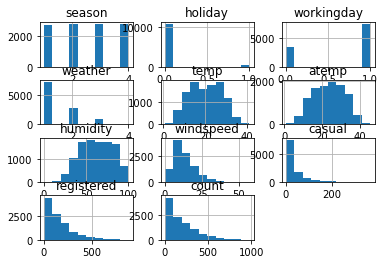

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
train.hist()

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>, <AxesSubplot:>]],
      dtype=object)

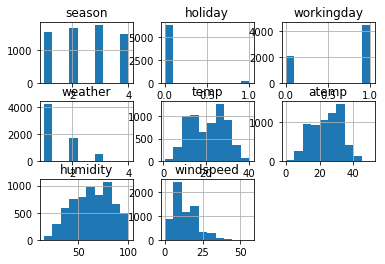

In [65]:
test.hist()

In [67]:
import datetime

In [70]:
def date(df):
    df.datetime.apply(lambda c : c.split( )[0])    

In [71]:
train1['date']=date(train1)

In [79]:
train2=train1.drop(['date'],axis=1)
train2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [81]:
train2['date']=train2.datetime.apply( lambda c : c.split( )[0])
train2['hour']=train2.datetime.apply( lambda c : c.split( )[1].split(':')[0]).astype('int')
train2['year']=train2.datetime.apply( lambda c : c.split( )[0].split('-')[0]).astype('int')
train2['month']=train2.datetime.apply( lambda c : c.split( )[0].split('-')[1]).astype('int')
train2['day']=train2.datetime.apply( lambda c : c.split( )[0].split('-')[2]).astype('int')
train2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,hour,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011-01-01,0,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011-01-01,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011-01-01,2,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011-01-01,3,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011-01-01,4,2011,1,1


In [86]:
train2.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
date           object
hour            int32
year            int32
month           int32
day             int32
dtype: object

In [87]:
train2['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [88]:
train2["season"] = train2["season"].astype('category')
train2["weather"] = train2["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [89]:
train2.dtypes

datetime        object
season        category
holiday          int64
workingday       int64
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
count            int64
date            object
hour             int32
year             int32
month            int32
day              int32
dtype: object

In [98]:
test1=test
test1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [99]:
test1['date']=test1.datetime.apply( lambda c : c.split( )[0])
test1['hour']=test1.datetime.apply( lambda c : c.split( )[1].split(':')[0]).astype('int')
test1['year']=test1.datetime.apply( lambda c : c.split( )[0].split('-')[0]).astype('int')
test1['month']=test1.datetime.apply( lambda c : c.split( )[0].split('-')[1]).astype('int')
test1['day']=test1.datetime.apply( lambda c : c.split( )[0].split('-')[2]).astype('int')
test1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,year,month,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,0,2011,1,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,1,2011,1,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2,2011,1,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,3,2011,1,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,4,2011,1,20


In [100]:
test1.dtypes

datetime        object
season        category
holiday          int64
workingday       int64
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
date            object
hour             int32
year             int32
month            int32
day              int32
dtype: object

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>, <AxesSubplot:>]],
      dtype=object)

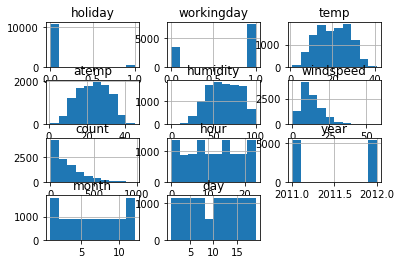

In [91]:
train2.hist()

array([[<AxesSubplot:title={'center':'hour'}>]], dtype=object)

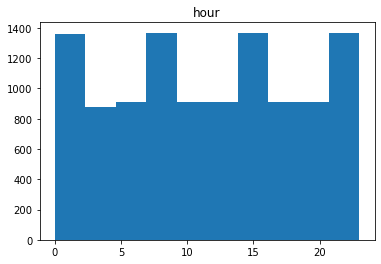

In [94]:
train2.hist(column=['hour'],grid=False)

In [95]:
predictor_new_features = TabularPredictor(label="count").fit(train2)

No path specified. Models will be saved in: "AutogluonModels/ag-20211030_090019\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211030_090019\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3095.01 MB
	Train Data (Original)  Memory Usage: 2.28 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify spe

[1000]	train_set's rmse: 30.0049	valid_set's rmse: 39.9741
[2000]	train_set's rmse: 25.0468	valid_set's rmse: 38.79
[3000]	train_set's rmse: 22.3584	valid_set's rmse: 38.4995
[4000]	train_set's rmse: 20.4501	valid_set's rmse: 38.5124


	-38.4532	 = Validation score   (root_mean_squared_error)
	18.43s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: LightGBM ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.2056	valid_set's rmse: 38.6265


	-38.4535	 = Validation score   (root_mean_squared_error)
	6.23s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-40.9971	 = Validation score   (root_mean_squared_error)
	7.71s	 = Training   runtime
	0.37s	 = Validation runtime
Fitting model: CatBoost ...
	-38.6848	 = Validation score   (root_mean_squared_error)
	347.91s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-42.1857	 = Validation score   (root_mean_squared_error)
	4.15s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-46.7048	 = Validation score   (root_mean_squared_error)
	40.86s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: XGBoost ...
	-38.9306	 = Validation score   (root_mean_squared_error)
	7.46s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	-40.2889	 = Validation score   (root_mean_squared_error)
	392.25s	 = Training   runtime
	0.3s	 = Validation 

In [96]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -35.071134       0.621742  430.043638                0.002000           1.190958            2       True         12
1         LightGBMLarge  -36.527765       0.060796   10.712399                0.060796          10.712399            1       True         11
2            LightGBMXT  -38.453217       0.213686   18.428301                0.213686          18.428301            1       True          3
3              LightGBM  -38.453505       0.073742    6.226789                0.073742           6.226789            1       True          4
4              CatBoost  -38.684795       0.066441  347.907365                0.066441         347.907365            1       True          6
5               XGBoost  -38.930614       0.043003    7.464904                0.043003      

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetMXNet': 'TabularNeuralNetModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -129.67448267621296,
  'KNeighborsDist': -126.1192191625866,
  'LightGBMXT': -38.453217190254556,
  'LightGBM': -38.453505086158046,
  'RandomForestMSE': -40.997057967475456,
  'CatBoost': -38.68479532854845,
  'ExtraTreesMSE': -42.185685576570094,
  'NeuralNetFastAI': -46.704812466055174,
  'XGBoost': -38.93061355946703,
  'NeuralNetMXNet': -40.28891859622081,
  'LightGBMLarge': -36.527764858092524,
  'WeightedEnsemble_L2': -35.07113417334187},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'Autogluo

In [101]:
prediction1=predictor_new_features.predict(test1)

In [102]:
prediction1.describe()

count    6493.000000
mean      189.764587
std       169.826141
min        -6.669136
25%        45.769466
50%       150.160431
75%       283.002869
max       833.247681
Name: count, dtype: float64

In [124]:
pred1=pd.DataFrame(prediction1,columns=['count'])

In [125]:
pred1

,count
0,11.791895
1,0.029040
2,-3.233005
3,1.003806
4,0.769121
...,...
6488,310.141968
6489,200.198669
6490,154.680801
6491,110.939606


In [135]:
pred1.loc[pred1['count']<0]=0

In [136]:
pred1

,count
0,11.791895
1,0.029040
2,0.000000
3,1.003806
4,0.769121
...,...
6488,310.141968
6489,200.198669
6490,154.680801
6491,110.939606


In [127]:
len(pred1.loc[pred1['count']< 0])

53

In [137]:
pred1.describe() 

,count
count,6493.000000
mean,189.779327
std,169.809540
min,0.000000
25%,45.769466
50%,150.160431
75%,283.002869
max,833.247681


In [141]:
len(pred1.loc[pred1['count']== 0])

53

In [142]:
submission["count"] = pred1
submission.to_csv("submission_new_features.csv", index=False)

In [143]:
sub1=pd.read_csv('submission_new_features.csv')
sub1.head()

,datetime,count
0,2011-01-20 00:00:00,11.791895
1,2011-01-20 01:00:00,0.029040
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,1.003806
4,2011-01-20 04:00:00,0.769121


# Hyper parameter optimization

In [174]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters0 = {'GBM': gbm_options,
                   'NN': nn_options,
                  } 
time_limit = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  

# hyperparameters1 = {'RF': [{'criterion': 'gini'}, {'criterion': 'entropy'}]}
hyperparameters2 = {1: {'RF':  [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'mse', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}},]},
                    2: {'CAT': {}, 'NN': {}}}
hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [155]:
predictor_new_hpo0 = TabularPredictor(label="count").fit(train2,hyperparameters=hyperparameters0, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,)

No path specified. Models will be saved in: "AutogluonModels/ag-20211030_113933\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211030_113933\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2198.53 MB
	Train Data (Original)  Memory Usage: 2.28 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify spe

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' a

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: NeuralNetMXNet\T0 ...
	-134.2385	 = Validation score   (root_mean_squared_error)
	24.44s	 = Training   runtime
	0.34s	 = Validation runtime
Fitted model: NeuralNetMXNet\T1 ...
	-142.719	 = Validation score   (root_mean_squared_error)
	23.35s	 = Training   runtime
	0.39s	 = Validation runtime
Fitted model: NeuralNetMXNet\T2 ...
	-140.4906	 = Validation score   (root_mean_squared_error)
	21.78s	 = Training   runtime
	0.42s	 = Validation runtime
Fitted model: NeuralNetMXNet\T3 ...
	-286.5358	 = Validation score   (root_mean_squared_error)
	20.38s	 = Training   runtime
	0.4s	 = Validation runtime
Fitted model: NeuralNetMXNet\T4 ...
	-143.8188	 = Validation score   (root_mean_squared_error)
	51.79s	 = Training   runtime
	0.56s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-40.3352	 = Validation score   (root_mean_squared_error)
	0.89s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 161.5s ...
TabularPredictor saved

In [156]:
predictor_new_hpo0.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -40.335189       0.072003   3.124002                0.002004           0.890996            2       True         11
1           LightGBM\T4  -40.394154       0.032998   1.155007                0.032998           1.155007            1       True          5
2           LightGBM\T3  -43.249246       0.037000   1.078000                0.037000           1.078000            1       True          4
3           LightGBM\T0  -44.023577       0.045997   4.218997                0.045997           4.218997            1       True          1
4           LightGBM\T2  -53.758579       0.040002   1.195997                0.040002           1.195997            1       True          3
5           LightGBM\T1  -72.391826       0.042001   1.206999                0.042001           1.

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM\\T0': 'LGBModel',
  'LightGBM\\T1': 'LGBModel',
  'LightGBM\\T2': 'LGBModel',
  'LightGBM\\T3': 'LGBModel',
  'LightGBM\\T4': 'LGBModel',
  'NeuralNetMXNet\\T0': 'TabularNeuralNetModel',
  'NeuralNetMXNet\\T1': 'TabularNeuralNetModel',
  'NeuralNetMXNet\\T2': 'TabularNeuralNetModel',
  'NeuralNetMXNet\\T3': 'TabularNeuralNetModel',
  'NeuralNetMXNet\\T4': 'TabularNeuralNetModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM\\T0': -44.023577142219466,
  'LightGBM\\T1': -72.39182578668473,
  'LightGBM\\T2': -53.75857899150048,
  'LightGBM\\T3': -43.24924578196489,
  'LightGBM\\T4': -40.3941537947499,
  'NeuralNetMXNet\\T0': -134.238525390625,
  'NeuralNetMXNet\\T1': -142.71902465820312,
  'NeuralNetMXNet\\T2': -140.4905548095703,
  'NeuralNetMXNet\\T3': -286.53582763671875,
  'NeuralNetMXNet\\T4': -143.81883239746094,
  'WeightedEnsemble_L2': -40.33518900273541},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'Ligh

In [157]:
prediction2=predictor_new_hpo0.predict(test1)

In [158]:
prediction2.describe()

count    6493.000000
mean      193.218155
std       172.959320
min       -12.208560
25%        50.406857
50%       151.652618
75%       289.777802
max       854.406616
Name: count, dtype: float64

In [159]:
pred2=pd.DataFrame(prediction2,columns=['count'])

In [160]:
pred2

,count
0,18.371283
1,5.418122
2,3.215305
3,2.883174
4,2.883174
...,...
6488,343.302765
6489,220.734634
6490,168.578262
6491,130.826523


In [161]:
pred2.loc[pred2['count']<0]=0

In [162]:
pred2

,count
0,18.371283
1,5.418122
2,3.215305
3,2.883174
4,2.883174
...,...
6488,343.302765
6489,220.734634
6490,168.578262
6491,130.826523


In [170]:
len(pred2.loc[pred2['count']< 0])

0

In [168]:
pred2.describe() 

,count
count,6493.000000
mean,193.248169
std,172.925385
min,0.000000
25%,50.406857
50%,151.652618
75%,289.777802
max,854.406616


In [169]:
len(pred2.loc[pred2['count']== 0])

73

In [171]:
submission["count"] = pred2
submission.to_csv("submission_hyperparameters0.csv", index=False)

In [172]:
sub1=pd.read_csv('submission_hyperparameters0.csv')
sub1.head()

,datetime,count
0,2011-01-20 00:00:00,18.371283
1,2011-01-20 01:00:00,5.418122
2,2011-01-20 02:00:00,3.215305
3,2011-01-20 03:00:00,2.883174
4,2011-01-20 04:00:00,2.883174


In [176]:
predictor_new_hpo1 = TabularPredictor(label="count").fit(train2,hyperparameters=hyperparameters2, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,)

No path specified. Models will be saved in: "AutogluonModels/ag-20211030_115457\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211030_115457\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2381.17 MB
	Train Data (Original)  Memory Usage: 2.28 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify spe

In [177]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -42.299303       0.499044  3.506961                0.000999           0.002002            2       True          2
1      RandomForestMSE -42.517913       0.498045  3.504959                0.498045           3.504959            1       True          1
Number of models trained: 2
Types of models trained:
{'WeightedEnsembleModel', 'RFModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 4 | ['humidity', 'hour', 'month', 'day']
('int', ['bool'])            : 3 | ['holiday', 'workingday', 'year']
('int', ['datetime_as_int']) : 2 | ['datetime', 'da

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForestMSE': 'RFModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForestMSE': -42.51791326330114,
  'WeightedEnsemble_L2': -42.299303191744976},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'RandomForestMSE': 'AutogluonModels/ag-20211030_115457\\models\\RandomForestMSE\\',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20211030_115457\\models\\WeightedEnsemble_L2\\'},
 'model_fit_times': {'RandomForestMSE': 3.5049591064453125,
  'WeightedEnsemble_L2': 0.002002239227294922},
 'model_pred_times': {'RandomForestMSE': 0.4980447292327881,
  'WeightedEnsemble_L2': 0.00099945068359375},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'RandomForestMSE': {'n_estimators': 300,
   'n_jobs': -1,
   'random_state': 0,
   'bootstrap': True,
   'criterion': 'mse'},
  'WeightedEnsemble_L2': {'use_orig_features': False,
   'max_base_models': 25,
   'max_base_models_per_type': 5,
   'save_bag_folds': True}},
 'leade

In [178]:
prediction3=predictor_new_hpo1.predict(test1)

In [179]:
prediction3.describe()

count    6493.000000
mean      196.227539
std       173.246643
min         1.650000
25%        54.656666
50%       155.039993
75%       293.013336
max       889.183350
Name: count, dtype: float64

In [180]:
pred3=pd.DataFrame(prediction3,columns=['count'])

In [183]:
pred3

,count
0,11.583333
1,5.956666
2,4.866667
3,3.166667
4,2.850000
...,...
6488,370.096680
6489,239.679993
6490,179.100006
6491,130.076660


In [184]:
pred3.loc[pred3['count']<0]=0

In [186]:
pred3

,count
0,11.583333
1,5.956666
2,4.866667
3,3.166667
4,2.850000
...,...
6488,370.096680
6489,239.679993
6490,179.100006
6491,130.076660


In [187]:
len(pred3.loc[pred3['count']< 0])

0

In [188]:
pred3.describe() 

,count
count,6493.000000
mean,196.227539
std,173.246643
min,1.650000
25%,54.656666
50%,155.039993
75%,293.013336
max,889.183350


In [190]:
len(pred3.loc[pred3['count']== 0])

0

In [191]:
submission["count"] = pred3
submission.to_csv("submission_hyperparameters2.csv", index=False)

In [192]:
sub1=pd.read_csv('submission_hyperparameters2.csv')
sub1.head()

,datetime,count
0,2011-01-20 00:00:00,11.583333
1,2011-01-20 01:00:00,5.956666
2,2011-01-20 02:00:00,4.866667
3,2011-01-20 03:00:00,3.166667
4,2011-01-20 04:00:00,2.850000


In [199]:
model={
    'WeightedEnsemble_L2': 'WeightedEnsembleModel'
}
hyperparameters3={
    'WeightedEnsemble_L2': {'use_orig_features': False,
   'max_base_models': 40,
   'max_base_models_per_type': 5,
   'save_bag_folds': True}
}

In [201]:
predictor_new_hpo2 = TabularPredictor(label='count').fit(train2,num_bag_folds=3,num_stack_levels=3, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, auto_stack=True)  

No path specified. Models will be saved in: "AutogluonModels/ag-20211101_064220\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211101_064220\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2398.84 MB
	Train Data (Original)  Memory Usage: 2.28 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify spe

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.1473	valid_set's rmse: 40.4907
[2000]	train_set's rmse: 23.599	valid_set's rmse: 39.178
[3000]	train_set's rmse: 20.5861	valid_set's rmse: 39.0505


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 26.8942	valid_set's rmse: 40.7216
[2000]	train_set's rmse: 21.0999	valid_set's rmse: 39.6371
[3000]	train_set's rmse: 18.0413	valid_set's rmse: 39.484


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3046	valid_set's rmse: 44.5029
[2000]	train_set's rmse: 21.5382	valid_set's rmse: 40.2231
[3000]	train_set's rmse: 17.7972	valid_set's rmse: 39.4379
[4000]	train_set's rmse: 15.4284	valid_set's rmse: 39.2203
[5000]	train_set's rmse: 13.6998	valid_set's rmse: 39.1878
[6000]	train_set's rmse: 12.3523	valid_set's rmse: 39.1681


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 25.1713	valid_set's rmse: 40.59
[2000]	train_set's rmse: 19.1741	valid_set's rmse: 39.4681
[3000]	train_set's rmse: 16.075	valid_set's rmse: 39.3958


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 28.7699	valid_set's rmse: 41.4787
[2000]	train_set's rmse: 22.3063	valid_set's rmse: 39.2964
[3000]	train_set's rmse: 19.2055	valid_set's rmse: 39.0229
[4000]	train_set's rmse: 17.0068	valid_set's rmse: 39.0334


Fitted model: LightGBMXT_BAG_L1\T0 ...
	-39.012	 = Validation score   (root_mean_squared_error)
	14.06s	 = Training   runtime
	0.59s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1\T1 ...
	-39.4564	 = Validation score   (root_mean_squared_error)
	12.66s	 = Training   runtime
	0.66s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1\T2 ...
	-39.1596	 = Validation score   (root_mean_squared_error)
	27.98s	 = Training   runtime
	1.31s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1\T3 ...
	-39.3819	 = Validation score   (root_mean_squared_error)
	17.33s	 = Training   runtime
	0.86s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1\T4 ...
	-39.0039	 = Validation score   (root_mean_squared_error)
	15.31s	 = Training   runtime
	0.74s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ...


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.3855	valid_set's rmse: 37.8786


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 15.3824	valid_set's rmse: 38.4737


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.2015	valid_set's rmse: 38.1576
[2000]	train_set's rmse: 14.3905	valid_set's rmse: 37.7204
[3000]	train_set's rmse: 11.0884	valid_set's rmse: 37.6754


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 17.2938	valid_set's rmse: 37.943
[2000]	train_set's rmse: 11.0815	valid_set's rmse: 37.5766
[3000]	train_set's rmse: 7.85404	valid_set's rmse: 37.4448


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 28.7333	valid_set's rmse: 39.0477
[2000]	train_set's rmse: 23.0225	valid_set's rmse: 38.0099
[3000]	train_set's rmse: 19.576	valid_set's rmse: 37.6619
[4000]	train_set's rmse: 17.2373	valid_set's rmse: 37.6111


Fitted model: LightGBM_BAG_L1\T0 ...
	-37.859	 = Validation score   (root_mean_squared_error)
	5.46s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T1 ...
	-38.4003	 = Validation score   (root_mean_squared_error)
	10.57s	 = Training   runtime
	0.44s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T2 ...
	-37.6584	 = Validation score   (root_mean_squared_error)
	21.41s	 = Training   runtime
	0.75s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T3 ...
	-37.4429	 = Validation score   (root_mean_squared_error)
	24.58s	 = Training   runtime
	0.78s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T4 ...
	-37.5711	 = Validation score   (root_mean_squared_error)
	11.82s	 = Training   runtime
	0.65s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ...
Fitted model: RandomForestMSE_BAG_L1\T0 ...
	-41.361	 = Validation score   (root_mean_squared_error)
	8.42s	 = Training   runtime
	1.22s	 = Validation runtime
Hyperparameter tu

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: CatBoost_BAG_L1\T0 ...
	-37.2801	 = Validation score   (root_mean_squared_error)
	494.85s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: CatBoost_BAG_L1\T1 ...
	-36.5665	 = Validation score   (root_mean_squared_error)
	943.79s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: CatBoost_BAG_L1\T2 ...
	-39.2652	 = Validation score   (root_mean_squared_error)
	507.91s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: CatBoost_BAG_L1\T3 ...
	-37.4007	 = Validation score   (root_mean_squared_error)
	321.55s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: CatBoost_BAG_L1\T4 ...
	-36.5522	 = Validation score   (root_mean_squared_error)
	188.22s	 = Training   runtime
	0.02s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ...
Fitted model: ExtraTreesMSE_BAG_L1\T0 ...
	-40.7722	 = Validation score   (root_mean_squared_error)
	2.38s	 = Training   runtime
	0.75s	 = Validation runtime
Hyperparamete

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: XGBoost_BAG_L1\T0 ...
	-38.1214	 = Validation score   (root_mean_squared_error)
	3.51s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: XGBoost_BAG_L1\T1 ...
	-38.0243	 = Validation score   (root_mean_squared_error)
	21.61s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: XGBoost_BAG_L1\T2 ...
	-39.6711	 = Validation score   (root_mean_squared_error)
	6.74s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: XGBoost_BAG_L1\T3 ...
	-41.146	 = Validation score   (root_mean_squared_error)
	3.99s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost_BAG_L1\T4 ...
	-37.8127	 = Validation score   (root_mean_squared_error)
	24.53s	 = Training   runtime
	0.15s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ...


  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: NeuralNetMXNet_BAG_L1\T0 ...
	-41.9609	 = Validation score   (root_mean_squared_error)
	376.0s	 = Training   runtime
	0.71s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L1\T1 ...
	-61.1076	 = Validation score   (root_mean_squared_error)
	446.4s	 = Training   runtime
	0.63s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L1\T2 ...
	-44.1283	 = Validation score   (root_mean_squared_error)
	512.27s	 = Training   runtime
	0.67s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L1\T3 ...
	-40.4038	 = Validation score   (root_mean_squared_error)
	534.99s	 = Training   runtime
	0.67s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L1\T4 ...
	-58.2776	 = Validation score   (root_mean_squared_error)
	240.8s	 = Training   runtime
	0.96s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a fut

[1000]	train_set's rmse: 6.8661	valid_set's rmse: 38.1832


	-38.1662	 = Validation score   (root_mean_squared_error)
	12.77s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: KNeighborsUnif_BAG_L1\T0 ...
	-123.9226	 = Validation score   (root_mean_squared_error)
	0.16s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1\T0 ...
	-119.3734	 = Validation score   (root_mean_squared_error)
	0.09s	 = Training   runtime
	0.37s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1\T0 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3475	valid_set's rmse: 40.5681
[2000]	train_set's rmse: 24.1062	valid_set's rmse: 38.8002
[3000]	train_set's rmse: 21.1147	valid_set's rmse: 38.3455
[4000]	train_set's rmse: 18.9613	valid_set's rmse: 38.1698
[5000]	train_set's rmse: 17.3517	valid_set's rmse: 38.0942
[6000]	train_set's rmse: 16.0028	valid_set's rmse: 38.0938


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3166	valid_set's rmse: 39.9626
[2000]	train_set's rmse: 23.9709	valid_set's rmse: 38.7544
[3000]	train_set's rmse: 20.9668	valid_set's rmse: 38.5588
[4000]	train_set's rmse: 18.8181	valid_set's rmse: 38.4995


	-38.5238	 = Validation score   (root_mean_squared_error)
	47.62s	 = Training   runtime
	2.47s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1\T1 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3475	valid_set's rmse: 40.5681
[2000]	train_set's rmse: 24.1062	valid_set's rmse: 38.8002
[3000]	train_set's rmse: 21.1147	valid_set's rmse: 38.3455
[4000]	train_set's rmse: 18.9613	valid_set's rmse: 38.1698
[5000]	train_set's rmse: 17.3517	valid_set's rmse: 38.0942
[6000]	train_set's rmse: 16.0028	valid_set's rmse: 38.0938


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3166	valid_set's rmse: 39.9626
[2000]	train_set's rmse: 23.9709	valid_set's rmse: 38.7544
[3000]	train_set's rmse: 20.9668	valid_set's rmse: 38.5588
[4000]	train_set's rmse: 18.8181	valid_set's rmse: 38.4995


	-38.6744	 = Validation score   (root_mean_squared_error)
	41.56s	 = Training   runtime
	2.45s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1\T2 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3475	valid_set's rmse: 40.5681
[2000]	train_set's rmse: 24.1062	valid_set's rmse: 38.8002
[3000]	train_set's rmse: 21.1147	valid_set's rmse: 38.3455
[4000]	train_set's rmse: 18.9613	valid_set's rmse: 38.1698
[5000]	train_set's rmse: 17.3517	valid_set's rmse: 38.0942
[6000]	train_set's rmse: 16.0028	valid_set's rmse: 38.0938


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3166	valid_set's rmse: 39.9626
[2000]	train_set's rmse: 23.9709	valid_set's rmse: 38.7544
[3000]	train_set's rmse: 20.9668	valid_set's rmse: 38.5588
[4000]	train_set's rmse: 18.8181	valid_set's rmse: 38.4995


	-38.5737	 = Validation score   (root_mean_squared_error)
	57.86s	 = Training   runtime
	3.2s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1\T3 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3475	valid_set's rmse: 40.5681
[2000]	train_set's rmse: 24.1062	valid_set's rmse: 38.8002
[3000]	train_set's rmse: 21.1147	valid_set's rmse: 38.3455
[4000]	train_set's rmse: 18.9613	valid_set's rmse: 38.1698
[5000]	train_set's rmse: 17.3517	valid_set's rmse: 38.0942
[6000]	train_set's rmse: 16.0028	valid_set's rmse: 38.0938


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3166	valid_set's rmse: 39.9626
[2000]	train_set's rmse: 23.9709	valid_set's rmse: 38.7544
[3000]	train_set's rmse: 20.9668	valid_set's rmse: 38.5588
[4000]	train_set's rmse: 18.8181	valid_set's rmse: 38.4995


	-38.6491	 = Validation score   (root_mean_squared_error)
	48.25s	 = Training   runtime
	2.59s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1\T4 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3475	valid_set's rmse: 40.5681
[2000]	train_set's rmse: 24.1062	valid_set's rmse: 38.8002
[3000]	train_set's rmse: 21.1147	valid_set's rmse: 38.3455
[4000]	train_set's rmse: 18.9613	valid_set's rmse: 38.1698
[5000]	train_set's rmse: 17.3517	valid_set's rmse: 38.0942
[6000]	train_set's rmse: 16.0028	valid_set's rmse: 38.0938


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3166	valid_set's rmse: 39.9626
[2000]	train_set's rmse: 23.9709	valid_set's rmse: 38.7544
[3000]	train_set's rmse: 20.9668	valid_set's rmse: 38.5588
[4000]	train_set's rmse: 18.8181	valid_set's rmse: 38.4995


	-38.5211	 = Validation score   (root_mean_squared_error)
	44.03s	 = Training   runtime
	2.58s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T0 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.5383	valid_set's rmse: 37.7415
[2000]	train_set's rmse: 13.4693	valid_set's rmse: 37.2343


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.303	valid_set's rmse: 39.2907
[2000]	train_set's rmse: 13.344	valid_set's rmse: 38.9468


	-38.0037	 = Validation score   (root_mean_squared_error)
	18.6s	 = Training   runtime
	0.76s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T1 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.5383	valid_set's rmse: 37.7415
[2000]	train_set's rmse: 13.4693	valid_set's rmse: 37.2343


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.303	valid_set's rmse: 39.2907
[2000]	train_set's rmse: 13.344	valid_set's rmse: 38.9468


	-38.1843	 = Validation score   (root_mean_squared_error)
	24.88s	 = Training   runtime
	1.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T2 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.5383	valid_set's rmse: 37.7415
[2000]	train_set's rmse: 13.4693	valid_set's rmse: 37.2343


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.303	valid_set's rmse: 39.2907
[2000]	train_set's rmse: 13.344	valid_set's rmse: 38.9468


	-37.9372	 = Validation score   (root_mean_squared_error)
	35.11s	 = Training   runtime
	1.44s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T3 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.5383	valid_set's rmse: 37.7415
[2000]	train_set's rmse: 13.4693	valid_set's rmse: 37.2343


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.303	valid_set's rmse: 39.2907
[2000]	train_set's rmse: 13.344	valid_set's rmse: 38.9468


	-37.866	 = Validation score   (root_mean_squared_error)
	40.65s	 = Training   runtime
	1.42s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T4 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.5383	valid_set's rmse: 37.7415
[2000]	train_set's rmse: 13.4693	valid_set's rmse: 37.2343


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 19.303	valid_set's rmse: 39.2907
[2000]	train_set's rmse: 13.344	valid_set's rmse: 38.9468


	-37.9083	 = Validation score   (root_mean_squared_error)
	26.26s	 = Training   runtime
	1.31s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1\T0 ...
	-41.361	 = Validation score   (root_mean_squared_error)
	8.42s	 = Training   runtime
	1.22s	 = Validation runtime
Fitting model: CatBoost_BAG_L1\T0 ...
	-37.6194	 = Validation score   (root_mean_squared_error)
	1030.39s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost_BAG_L1\T1 ...
	-37.3852	 = Validation score   (root_mean_squared_error)
	30070.76s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost_BAG_L1\T2 ...
	-38.2868	 = Validation score   (root_mean_squared_error)
	1537.39s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: CatBoost_BAG_L1\T3 ...
	-37.6593	 = Validation score   (root_mean_squared_error)
	1327.63s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: CatBoost_BAG_L1\T4 ...
	-37.3805	 = Validation score   (root_mean_squared_error

[1000]	train_set's rmse: 6.42914	valid_set's rmse: 37.4454


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 6.55542	valid_set's rmse: 39.6632
[2000]	train_set's rmse: 2.55427	valid_set's rmse: 39.5819


	-38.3919	 = Validation score   (root_mean_squared_error)
	55.6s	 = Training   runtime
	1.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-35.7277	 = Validation score   (root_mean_squared_error)
	4.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models ...
Hyperparameter tuning model: LightGBMXT_BAG_L2 ...


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' a

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' a

[1000]	train_set's rmse: 29.3811	valid_set's rmse: 38.6378


Fitted model: LightGBM_BAG_L2\T0 ...
	-38.7625	 = Validation score   (root_mean_squared_error)
	1.83s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T1 ...
	-38.7914	 = Validation score   (root_mean_squared_error)
	4.26s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T2 ...
	-39.0478	 = Validation score   (root_mean_squared_error)
	2.34s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T3 ...
	-39.0491	 = Validation score   (root_mean_squared_error)
	4.26s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBM_BAG_L2\T4 ...
	-38.6125	 = Validation score   (root_mean_squared_error)
	4.92s	 = Training   runtime
	0.12s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ...
Fitted model: RandomForestMSE_BAG_L2\T0 ...
	-36.3395	 = Validation score   (root_mean_squared_error)
	42.91s	 = Training   runtime
	1.6s	 = Validation runtime
Hyperparameter tuni

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: CatBoost_BAG_L2\T0 ...
	-38.3433	 = Validation score   (root_mean_squared_error)
	23.05s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: CatBoost_BAG_L2\T1 ...
	-38.2927	 = Validation score   (root_mean_squared_error)
	110.78s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: CatBoost_BAG_L2\T2 ...
	-38.3004	 = Validation score   (root_mean_squared_error)
	74.12s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: CatBoost_BAG_L2\T3 ...
	-39.1115	 = Validation score   (root_mean_squared_error)
	16.54s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: CatBoost_BAG_L2\T4 ...
	-38.8787	 = Validation score   (root_mean_squared_error)
	14.31s	 = Training   runtime
	0.02s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ...
Fitted model: ExtraTreesMSE_BAG_L2\T0 ...
	-36.108	 = Validation score   (root_mean_squared_error)
	9.77s	 = Training   runtime
	1.47s	 = Validation runtime
Hyperparameter tun

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: XGBoost_BAG_L2\T0 ...
	-38.5764	 = Validation score   (root_mean_squared_error)
	4.01s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: XGBoost_BAG_L2\T1 ...
	-38.6629	 = Validation score   (root_mean_squared_error)
	3.62s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: XGBoost_BAG_L2\T2 ...
	-38.1544	 = Validation score   (root_mean_squared_error)
	2.52s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost_BAG_L2\T3 ...
	-38.6328	 = Validation score   (root_mean_squared_error)
	13.06s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: XGBoost_BAG_L2\T4 ...
	-38.6152	 = Validation score   (root_mean_squared_error)
	28.51s	 = Training   runtime
	0.17s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ...


  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: NeuralNetMXNet_BAG_L2\T0 ...
	-39.0847	 = Validation score   (root_mean_squared_error)
	287.19s	 = Training   runtime
	1.0s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L2\T1 ...
	-38.6102	 = Validation score   (root_mean_squared_error)
	113.84s	 = Training   runtime
	0.98s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L2\T2 ...
	-42.895	 = Validation score   (root_mean_squared_error)
	237.76s	 = Training   runtime
	0.93s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L2\T3 ...
	-38.9165	 = Validation score   (root_mean_squared_error)
	216.15s	 = Training   runtime
	0.91s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L2\T4 ...
	-38.6814	 = Validation score   (root_mean_squared_error)
	191.95s	 = Training   runtime
	0.92s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a fu

	7.17s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T3 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-36.599	 = Validation score   (root_mean_squared_error)
	9.09s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: LightGBM_BAG_L2\T4 ...
C:\Users\KIIT\anaconda3\envs\pyto

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' a

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' a

[1000]	train_set's rmse: 26.2238	valid_set's rmse: 37.8905


C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Fitted model: LightGBM_BAG_L3\T0 ...
	-37.8374	 = Validation score   (root_mean_squared_error)
	1.35s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBM_BAG_L3\T1 ...
	-38.0925	 = Validation score   (root_mean_squared_error)
	8.05s	 = Training   runtime
	0.14

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: CatBoost_BAG_L3\T0 ...
	-37.1851	 = Validation score   (root_mean_squared_error)
	14.56s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost_BAG_L3\T1 ...
	-37.3303	 = Validation score   (root_mean_squared_error)
	50.34s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost_BAG_L3\T2 ...
	-37.2387	 = Validation score   (root_mean_squared_error)
	34.57s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost_BAG_L3\T3 ...
	-37.2679	 = Validation score   (root_mean_squared_error)
	27.75s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost_BAG_L3\T4 ...
	-37.3591	 = Validation score   (root_mean_squared_error)
	17.74s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L3 ...
Fitted model: ExtraTreesMSE_BAG_L3\T0 ...
	-36.7245	 = Validation score   (root_mean_squared_error)
	10.08s	 = Training   runtime
	1.1s	 = Validation runtime
Hyperparameter tun

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: XGBoost_BAG_L3\T0 ...
	-38.3278	 = Validation score   (root_mean_squared_error)
	2.85s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: XGBoost_BAG_L3\T1 ...
	-37.7585	 = Validation score   (root_mean_squared_error)
	6.36s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost_BAG_L3\T2 ...
	-37.4406	 = Validation score   (root_mean_squared_error)
	4.41s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: XGBoost_BAG_L3\T3 ...
	-37.0555	 = Validation score   (root_mean_squared_error)
	2.48s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost_BAG_L3\T4 ...
	-37.4902	 = Validation score   (root_mean_squared_error)
	2.87s	 = Training   runtime
	0.04s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L3 ...


  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: NeuralNetMXNet_BAG_L3\T0 ...
	-37.9853	 = Validation score   (root_mean_squared_error)
	89.6s	 = Training   runtime
	0.44s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L3\T1 ...
	-41.0459	 = Validation score   (root_mean_squared_error)
	146.07s	 = Training   runtime
	0.66s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L3\T2 ...
	-37.3061	 = Validation score   (root_mean_squared_error)
	71.54s	 = Training   runtime
	0.39s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L3\T3 ...
	-37.1004	 = Validation score   (root_mean_squared_error)
	151.4s	 = Training   runtime
	0.45s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L3\T4 ...
	-40.0811	 = Validation score   (root_mean_squared_error)
	176.27s	 = Training   runtime
	0.45s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L3 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a futu

	11.22s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T3 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-36.9782	 = Validation score   (root_mean_squared_error)
	4.89s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM_BAG_L3\T4 ...
C:\Users\KIIT\anaconda3\envs\py

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' a

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' a

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: CatBoost_BAG_L4\T0 ...
	-36.175	 = Validation score   (root_mean_squared_error)
	15.13s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: CatBoost_BAG_L4\T1 ...
	-36.007	 = Validation score   (root_mean_squared_error)
	30.65s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: CatBoost_BAG_L4\T2 ...
	-36.3432	 = Validation score   (root_mean_squared_error)
	15.15s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost_BAG_L4\T3 ...
	-36.1132	 = Validation score   (root_mean_squared_error)
	16.18s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost_BAG_L4\T4 ...
	-36.2034	 = Validation score   (root_mean_squared_error)
	8.87s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L4 ...
Fitted model: ExtraTreesMSE_BAG_L4\T0 ...
	-36.9596	 = Validation score   (root_mean_squared_error)
	9.36s	 = Training   runtime
	1.05s	 = Validation runtime
Hyperparameter tuning

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: XGBoost_BAG_L4\T0 ...
	-37.3077	 = Validation score   (root_mean_squared_error)
	2.8s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: XGBoost_BAG_L4\T1 ...
	-36.2376	 = Validation score   (root_mean_squared_error)
	5.99s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: XGBoost_BAG_L4\T2 ...
	-36.2397	 = Validation score   (root_mean_squared_error)
	4.85s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost_BAG_L4\T3 ...
	-35.9927	 = Validation score   (root_mean_squared_error)
	1.5s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: XGBoost_BAG_L4\T4 ...
	-36.2652	 = Validation score   (root_mean_squared_error)
	1.41s	 = Training   runtime
	0.04s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L4 ...


  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: NeuralNetMXNet_BAG_L4\T0 ...
	-37.2945	 = Validation score   (root_mean_squared_error)
	83.63s	 = Training   runtime
	0.43s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L4\T1 ...
	-36.4822	 = Validation score   (root_mean_squared_error)
	89.91s	 = Training   runtime
	0.43s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L4\T2 ...
	-36.8057	 = Validation score   (root_mean_squared_error)
	375.11s	 = Training   runtime
	0.52s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L4\T3 ...
	-39.9731	 = Validation score   (root_mean_squared_error)
	103.98s	 = Training   runtime
	0.43s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L4\T4 ...
	-263.9375	 = Validation score   (root_mean_squared_error)
	44.8s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L4 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a fut

	9.38s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T3 ...
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-37.0672	 = Validation score   (root_mean_squared_error)
	7.11s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L4\T4 ...
C:\Users\KIIT\anaconda3\envs\pyt

In [202]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                         model   score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          WeightedEnsemble_L3  -35.597325      53.035720  46370.840099                0.005002           2.289999            3       True         62
1          WeightedEnsemble_L2  -35.727722       8.537014   4681.318354                0.003994           4.042357            2       True         32
2           CatBoost_BAG_L2\T1  -35.938453      36.683356  43457.730866                0.116721         177.039390            2       True         45
3           CatBoost_BAG_L2\T2  -35.941182      36.667349  43414.079533                0.100714         133.388057            2       True         46
4           CatBoost_BAG_L2\T0  -35.956411      36.748799  43373.301263                0.182164          92.609787            2       True         44
5          WeightedEnsemble_L4  -36.03

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1\\T0': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1\\T0': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1\\T0': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1\\T3': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1\\T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T0': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T4': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1\\T0': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1\\T0': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1\\T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1\\T2': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1\\T3': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1\\T4': 'StackerEns

In [203]:
prediction2=predictor_new_hpo2.predict(test1)

In [204]:
prediction2.describe()

count    6493.000000
mean      188.570312
std       171.357483
min         2.163824
25%        47.445900
50%       147.938370
75%       279.178558
max       863.577942
Name: count, dtype: float64

In [205]:
pred2=pd.DataFrame(prediction2,columns=['count'])

In [206]:
pred2

,count
0,10.816630
1,4.842036
2,3.521531
3,3.466303
4,3.496328
...,...
6488,311.447418
6489,207.591797
6490,153.811066
6491,111.225342


In [207]:
pred2.loc[pred2['count']<0]=0

In [208]:
pred2

,count
0,10.816630
1,4.842036
2,3.521531
3,3.466303
4,3.496328
...,...
6488,311.447418
6489,207.591797
6490,153.811066
6491,111.225342


In [209]:
len(pred2.loc[pred2['count']< 0])

0

In [210]:
pred2.describe() 

,count
count,6493.000000
mean,188.570312
std,171.357483
min,2.163824
25%,47.445900
50%,147.938370
75%,279.178558
max,863.577942


In [141]:
len(pred1.loc[pred1['count']== 0])

53

In [211]:
submission["count"] = pred2
submission.to_csv("submission_new_hyperparameter3.csv", index=False)

In [212]:
sub1=pd.read_csv('submission_new_hyperparameter3.csv')
sub1.head()

,datetime,count
0,2011-01-20 00:00:00,10.816630
1,2011-01-20 01:00:00,4.842036
2,2011-01-20 02:00:00,3.521531
3,2011-01-20 03:00:00,3.466303
4,2011-01-20 04:00:00,3.496328


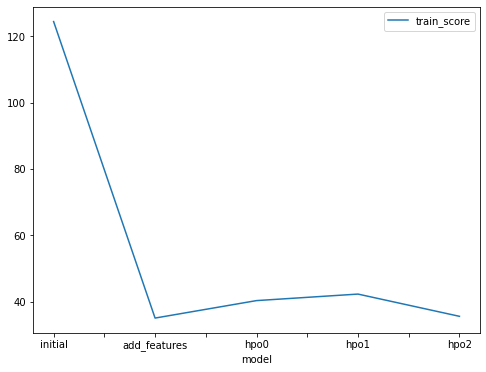

In [220]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo0", "hpo1","hpo2"],
        "train_score": [124.419851, 35.071134,40.335189,42.299303, 35.597325]
    }
).plot(x="model", y="train_score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

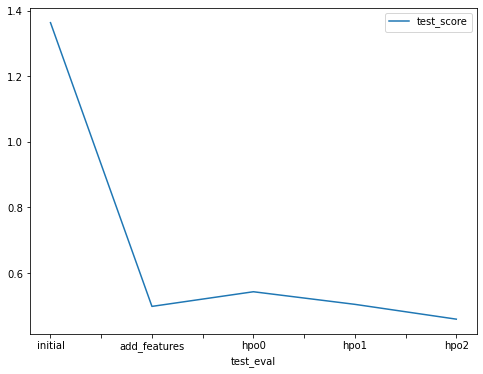

In [221]:
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo0", "hpo1","hpo2"],
        "test_score": [1.36363, 0.49831,0.54301,0.50459, 0.45939]
    }
).plot(x="test_eval", y="test_score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

In [227]:
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["Default", "Parsing of Dates", "GBM, NN"],
    "hpo2": ["Default", "Four columns Added", "RF ,CAT"],
    "hpo3": ["Default", "feature selection", "Bagging ,Stack level"],
    "score": [1.36363, 0.49831, 0.45939]
})

,model,hpo1,hpo2,hpo3,score
0,initial,Default,Default,Default,1.36363
1,add_features,Parsing of Dates,Four columns Added,feature selection,0.49831
2,hpo,"GBM, NN","RF ,CAT","Bagging ,Stack level",0.45939
